In [5]:
import numpy as np
import pandas as pd
from Freezer import getMyPosition as getPosition
import seaborn as sns
import matplotlib.pyplot as plt

nInst = 0
nt = 0

# Commission rate
commRate = 0.0025 # was 0.0050

# Dollar position limit (maximum absolute dollar value of any individual stock position)
dlrPosLimit = 10000

timeOut=600 

pricesFile="./prc500.txt"
prcAll = (pd.read_csv(pricesFile, sep='\s+', header=None, index_col=None).values).T
df = pd.DataFrame(prcAll)
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,40.44,40.58,40.52,40.47,40.23,40.22,40.28,40.18,40.30,40.28,...,39.80,39.64,39.53,39.43,39.36,39.45,39.45,39.24,39.14,39.32
1,4.90,4.88,4.90,4.92,4.91,4.95,4.95,4.92,4.92,4.91,...,3.04,3.05,3.06,3.03,3.00,3.00,3.00,3.02,3.01,3.03
2,30.92,30.95,31.02,30.98,30.93,30.89,30.86,30.78,30.71,30.68,...,27.13,27.15,27.20,27.25,27.19,27.18,27.20,27.18,27.17,27.16
3,18.51,18.41,18.37,18.42,18.39,18.42,18.31,18.37,18.41,18.36,...,16.49,16.40,16.36,16.32,16.36,16.29,16.27,16.16,16.19,16.23
4,47.69,47.55,47.70,47.66,48.09,47.97,48.07,47.95,48.05,48.16,...,44.26,44.28,44.27,44.39,44.46,44.49,44.32,44.18,44.07,43.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,63.15,63.15,63.16,63.19,63.19,63.16,63.16,63.13,63.10,63.07,...,60.70,60.69,60.68,60.68,60.67,60.66,60.67,60.68,60.68,60.67
96,51.62,51.69,51.68,51.74,51.81,51.84,51.91,51.82,51.83,51.72,...,49.25,49.20,49.16,49.23,49.33,49.36,49.33,49.39,49.38,49.35
97,11.12,11.15,11.16,11.14,11.14,11.11,11.06,11.06,11.02,11.01,...,8.13,8.14,8.11,8.11,8.10,8.11,8.12,8.08,8.06,8.03
98,33.32,33.35,33.31,33.70,33.76,33.74,33.81,33.69,33.46,33.67,...,32.12,32.11,32.18,31.91,31.86,32.02,32.05,32.06,32.14,32.36


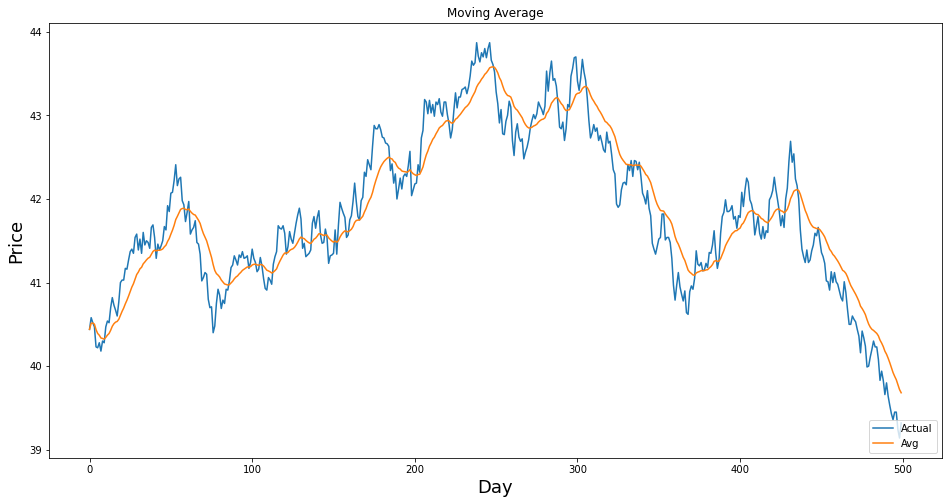

,Close,EWMA30
0,40.44,40.440000
1,40.58,40.513500
2,40.52,40.515887
3,40.47,40.502640
4,40.23,40.436691
...,...,...
495,39.45,39.878499
496,39.45,39.837690
497,39.24,39.780767
498,39.14,39.719741


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

prc_series = pd.DataFrame(prcAll[0], columns=['Close'])
prc_series['EWMA30'] = prc_series['Close'].ewm(span=20).mean()

  
# visualise
plt.figure(figsize=(16,8))
plt.title("Moving Average")
plt.plot(prc_series["Close"])
plt.plot(prc_series["EWMA30"])
plt.xlabel("Day", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.legend(["Actual","Avg"], loc = "lower right")
plt.show()

prc_series

In [7]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(prc_series[['Close']], prc_series[['EWMA30']], test_size=.2)

# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

len(y_pred)


100

In [8]:
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


Model Coefficients: [[0.86500747]]
Mean Absolute Error: 0.2213335999415559
Coefficient of Determination: 0.9019588398411575


In [10]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# for i in range(len(prcSoFar)):
close_prc = prcAll[i][-1]

prc_series = pd.DataFrame(prcAll[i], columns=['Close'])
prc_series['EWMA30'] = prc_series['Close'].ewm(span=20).mean()

# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(prc_series[['EWMA30']], prc_series[['Close']], test_size=.2)

# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)


def getMyPosition (prcSoFar):

    global currentPos
    
    if len(prcSoFar[0]) >30:
        for i in range(len(prcSoFar)):
            
            close_prc = prcSoFar[i][-1]

            prc_series = pd.DataFrame(prcAll[i], columns=['Close'])
            prc_series['EWMA30'] = prc_series['Close'].ewm(span=20).mean()
            
            # Split data into testing and training sets
            X_train, X_test, y_train, y_test = train_test_split(prc_series[['Close']], prc_series[['EWMA30']], test_size=.2)

            # Create Regression Model
            model = LinearRegression()
            # Train the model
            model.fit(X_train, y_train)
            # Use model to make predictions
            y_pred = model.predict(X_test)

            if y_pred[0] >= close_prc:
                currentPos += 9000 / close_prc
            elif y_pred[0] <= close_prc:
                currentPos -= 9000 / close_prc


    # Build your function body here

    return currentPos
    

NameError: name 'i' is not defined

In [ ]:
import pandas as pd
import numpy as np

nInst=100
currentPos = np.zeros(nInst)

def getMyPosition (prcSoFar):
    global currentPos
    
    for i in range(len(prcSoFar)):
        close_prc = prcSoFar[i][-1]

        # days looking back for moving avg
        span = 15
        span_ceiling = 30
        span_floor = 10
        
        # changing span depending on volatility
        if len(prcSoFar[0]) > 31:

            todayVola = np.std(prcSoFar[i][-31:-2])
            yesterdayVola = np.std(prcSoFar[i][-30:])

            normVola = (todayVola - yesterdayVola) / todayVola
            span = round(span * (1 + normVola))

            if span > span_ceiling:
                span = span_ceiling
            elif span < span_floor:
                span = span_floor


        # calculate moving avg
        prc_series = pd.DataFrame(prcSoFar[i], columns=['Close'])
        prc_series['EWMA'] = prc_series['Close'].ewm(span=span).mean()

        # setting boundaries for trade criteria
        avg_prc = sum(prcSoFar[i]) / len(prcSoFar[i])
        std_multiple = np.std(prcSoFar[i])
        shift = avg_prc*std_multiple

        # setting trade criteria
        if prc_series["EWMA"].iloc[-1] + shift  <= close_prc:
            currentPos[i] -= round(8500 / close_prc)
        elif prc_series["EWMA"].iloc[-1] - shift  >= close_prc:
            currentPos[i] -= round(8500 / close_prc)


    return currentPos


NameError: name 'prcSoFar' is not defined

<h3>备用1

In [ ]:
import numpy as np
import pandas as pd

nInst=100
currentPos = np.zeros(nInst)


def getMyPosition (prcSoFar):

    global currentPos
    currentPos = np.zeros(nInst)

    if len(prcSoFar[0]) > 32:
        for i in range(nInst):

            lb = 20
            lb_ceiling = 30
            lb_floor = 10

            close = prcSoFar[i]
            todayVola = np.std(close[-31:-2])
            yesterdayVola = np.std(close[-30:])

            normVola = (todayVola - yesterdayVola) / todayVola
            lb = round(lb * (1 + normVola))

            if lb > lb_ceiling:
                lb = lb_ceiling
            elif lb < lb_floor:
                lb = lb_floor
            
            
            q75, q25 = np.percentile(close[-lb:-1], [75 ,25])
            iqr = q75 - q25

            no_outlier = []
            for x in close[-lb:-1]:
                if x < q75 + iqr*1.5:
                    no_outlier.append(x)
            
            high = max(no_outlier)

            if close[-1] <= high * 0.9:
                currentPos[i] += round(8000 / close[-1])
            
            elif close[-1] >= high * 1.1:
                currentPos[i] -= round(8000 / close[-1]) 

    # Build your function body here

    return currentPos
    


In [ ]:
import numpy as np
import pandas as pd

nInst=100
currentPos = np.zeros(nInst)


def getMyPosition (prcSoFar):

    global currentPos
    currentPos = np.zeros(nInst)

    if len(prcSoFar[0]) > 32:
        for i in range(nInst):

            lb = 20
            lb_ceiling = 30
            lb_floor = 10

            close = prcSoFar[i]
            todayVola = np.std(close[-31:-2])
            yesterdayVola = np.std(close[-30:])

            normVola = (todayVola - yesterdayVola) / todayVola
            lb = round(lb * (1 + normVola))

            if lb > lb_ceiling:
                lb = lb_ceiling
            elif lb < lb_floor:
                lb = lb_floor
            
            
            avg = sum(close[-lb:])/len(close[-lb:])

            if close[-1] <= avg * 0.98:
                currentPos[i] += round(8000 / close[-1])
            
            elif close[-1] >= avg * 1.02:
                currentPos[i] -= round(8000 / close[-1]) 

    # Build your function body here

    return currentPos
    


In [ ]:
getMyPosition(prcAll)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])